<a href="https://colab.research.google.com/github/adityanarayanan13/Assignment-1-S.Aditya-Narayanan/blob/main/Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [3]:
df = pd.read_csv('data.csv')

Data Processing


In [4]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [5]:
df.drop("Unnamed: 32", axis=1, inplace=True)
df.drop('id',axis=1, inplace=True)


In [6]:
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [7]:
df['diagnosis']=df['diagnosis'].map({'B':0,'M':1})

In [8]:
df['diagnosis'].value_counts()

,count
diagnosis,
0,357
1,212


In [9]:
from sklearn.model_selection import train_test_split

# splitting data
X_train, X_test, y_train, y_test = train_test_split(
                df.drop('diagnosis', axis=1),
                df['diagnosis'],
                test_size=0.2,
                random_state=42)

print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)

Shape of training set: (455, 30)
Shape of test set: (114, 30)


In [10]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
error_rate = []

for i in range(1,42):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

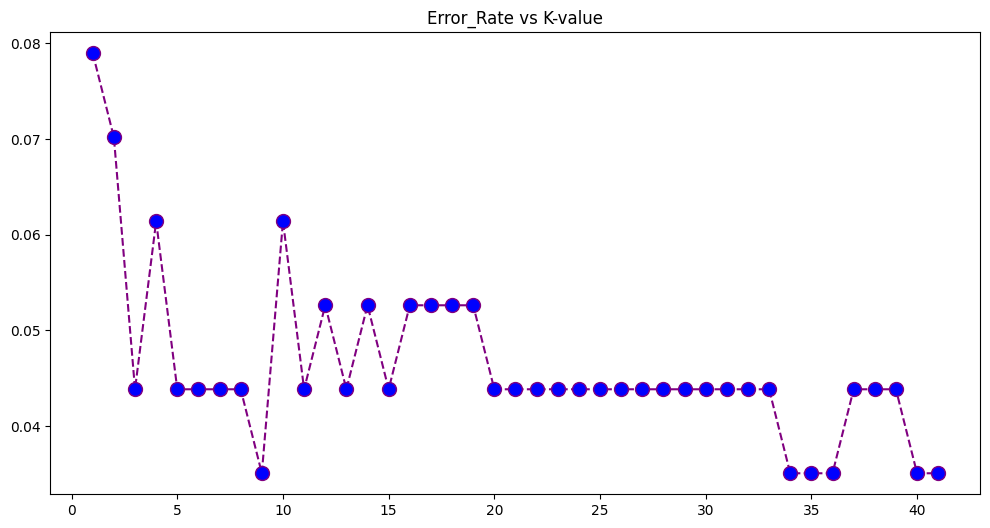

In [16]:
plt.figure(figsize=(12,6))
plt.plot(range(1,42), error_rate, color='purple', linestyle="--",
         marker='o', markersize=10, markerfacecolor='b')
plt.title('Error_Rate vs K-value')
plt.show()

In [17]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
predictions2 = knn.predict(X_test)

In [18]:
print(confusion_matrix(y_test, predictions2))
print("\n")
print(classification_report(y_test, predictions2))

[[69  2]
 [ 2 41]]


              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [19]:
knn_model_acc = accuracy_score(y_test, predictions2)
print("Accuracy of K Neighbors Classifier Model is: ", knn_model_acc)

Accuracy of K Neighbors Classifier Model is:  0.9649122807017544


Decision Tree

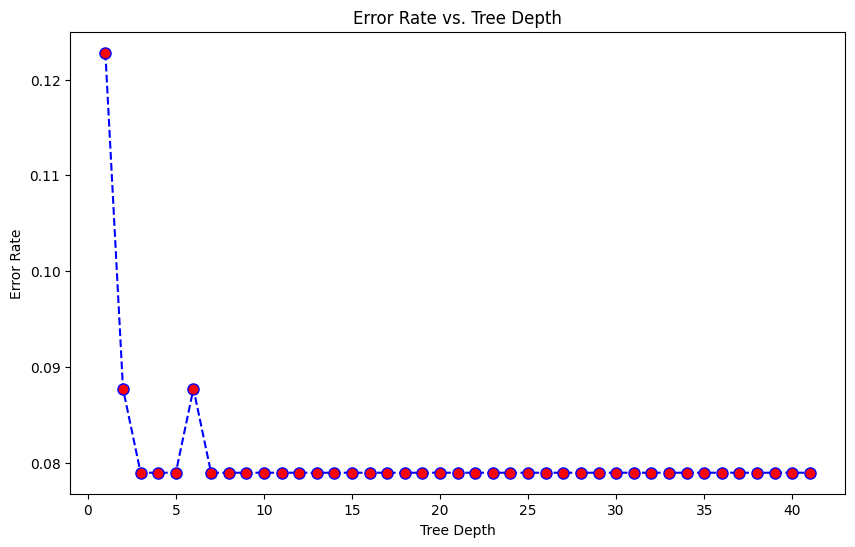

In [20]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

error_rate = []

# Loop through different values for max_depth
for depth in range(1, 42):
    dtree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

# Plotting the error rate against max_depth
plt.figure(figsize=(10,6))
plt.plot(range(1, 42), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. Tree Depth')
plt.xlabel('Tree Depth')
plt.ylabel('Error Rate')
plt.show()


In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt


optimal_depth = 5
dtree = DecisionTreeClassifier(max_depth=optimal_depth, random_state=42)
dtree.fit(X_train, y_train)


y_pred = dtree.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)


print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("Accuracy Score:", accuracy)

Confusion Matrix:
 [[68  3]
 [ 6 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94        71
           1       0.93      0.86      0.89        43

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114

Accuracy Score: 0.9210526315789473


SVM

In [23]:
from sklearn.svm import SVC

svc_model = SVC(kernel="rbf")
svc_model.fit(X_train, y_train)
predictions5 = svc_model.predict(X_test)

In [24]:
print("Confusion Matrix: \n", confusion_matrix(y_test, predictions5))
print("\n")
print(classification_report(y_test, predictions5))

Confusion Matrix: 
 [[71  0]
 [ 2 41]]


              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [25]:
svm_acc = accuracy_score(y_test, predictions5)
print("Accuracy of SVM model is: ", svm_acc)

Accuracy of SVM model is:  0.9824561403508771
